In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))
df.dtypes

date     datetime64[ns]
mktrf           float64
rf              float64
dtype: object

In [31]:
df_1983_2022 = df[((df['date'] >= pd.to_datetime('1983-01-01')) & (df['date'] <= pd.to_datetime('2022-12-31')))]
df_1983_2022.head

<bound method NDFrame.head of             date   mktrf       rf
15166 1983-01-03 -0.0145  0.00033
15167 1983-01-04  0.0167  0.00033
15168 1983-01-05  0.0050  0.00033
15169 1983-01-06  0.0228  0.00033
15170 1983-01-07  0.0008  0.00033
...          ...     ...      ...
25245 2022-12-23  0.0051  0.00016
25246 2022-12-27 -0.0051  0.00016
25247 2022-12-28 -0.0123  0.00016
25248 2022-12-29  0.0187  0.00016
25249 2022-12-30 -0.0022  0.00016

[10084 rows x 3 columns]>

In [32]:
# Question 1.1
def calculate1(df_1983_2022):
    man_fee = 0.0005
    df1 = df_1983_2022[['date', 'rf']].copy()
    df1['rf+1'] = df1['rf'].apply(lambda x: x + 1)
    df1['return'] = 1
    for row in df1.iloc[1:].itertuples():
        date = df1.at[row.Index, 'date']
        curr_return = df1.at[row.Index - 1, 'return'] * df1.at[row.Index, 'rf+1']
        if date.day == 30 & date.month == 12:
            df1.at[row.Index, 'return'] = curr_return * (1 - man_fee)
        else:
            df1.at[row.Index, 'return'] = curr_return
    return df1

df1 = calculate1(df_1983_2022)
df1.head

<bound method NDFrame.head of             date       rf     rf+1    return
15166 1983-01-03  0.00033  1.00033  1.000000
15167 1983-01-04  0.00033  1.00033  1.000330
15168 1983-01-05  0.00033  1.00033  1.000660
15169 1983-01-06  0.00033  1.00033  1.000990
15170 1983-01-07  0.00033  1.00033  1.001321
...          ...      ...      ...       ...
25245 2022-12-23  0.00016  1.00016  3.720681
25246 2022-12-27  0.00016  1.00016  3.721277
25247 2022-12-28  0.00016  1.00016  3.721872
25248 2022-12-29  0.00016  1.00016  3.722468
25249 2022-12-30  0.00016  1.00016  3.723063

[10084 rows x 4 columns]>

In [33]:
# Question 1.2

def calculate2(df_1983_2022):
    man_fee = 0.0005

    df2 = df_1983_2022[['date', 'rf', 'mktrf']].copy()
    df2['mktrf+rf+1'] = df2['rf'].apply(lambda x: x + 1) + df2['mktrf']
    df2['return'] = 1

    for row in df2.iloc[1:].itertuples():
        date = df2.at[row.Index, 'date']
        curr_return = df2.at[row.Index - 1, 'return'] * df2.at[row.Index, 'mktrf+rf+1']
        if date.day == 30 & date.month == 12:
            df2.at[row.Index, 'return'] = curr_return * (1 - man_fee)
        else:
            df2.at[row.Index, 'return'] = curr_return

    return df2

df2 = calculate2(df_1983_2022)
df2.head

<bound method NDFrame.head of             date       rf   mktrf  mktrf+rf+1     return
15166 1983-01-03  0.00033 -0.0145     0.98583   1.000000
15167 1983-01-04  0.00033  0.0167     1.01703   1.017030
15168 1983-01-05  0.00033  0.0050     1.00533   1.022451
15169 1983-01-06  0.00033  0.0228     1.02313   1.046100
15170 1983-01-07  0.00033  0.0008     1.00113   1.047282
...          ...      ...     ...         ...        ...
25245 2022-12-23  0.00016  0.0051     1.00526  66.015366
25246 2022-12-27  0.00016 -0.0051     0.99506  65.689250
25247 2022-12-28  0.00016 -0.0123     0.98786  64.891782
25248 2022-12-29  0.00016  0.0187     1.01886  66.115641
25249 2022-12-30  0.00016 -0.0022     0.99796  65.980765

[10084 rows x 5 columns]>

In [34]:
# Question 1.3

def calculate3(df_1983_2022):
    man_fee = 0.0020
    mkt_fee = 0.0020
    bnd_fee = 0.0002
    age = 25
    bnd_amount = age * 0.01
    mkt_amount = 1 - bnd_amount
    bnd_return = 0
    mkt_return = 0

    df3 = df_1983_2022[['date', 'rf', 'mktrf']].copy()
    df3['rf+1'] = df3['rf'].apply(lambda x: x + 1)
    df3['mktrf+rf+1'] = df3['rf'].apply(lambda x: x + 1) + df3['mktrf']
    df3.loc[df3.index[:1], 'return'] = df3[:1].get('rf+1')* 25 * 0.01 + df3[:1].get('mktrf+rf+1') * 75 * 0.01
    df3.loc[1:, 'age'] = 25
    df3.loc[df3.tail(1).index, 'age'] = 64
    for row in df3.iloc[1:-1].itertuples():
        i = row.Index
        if df3.loc[i, 'date'].year != df3.loc[i + 1, 'date'].year:
            age += 1
            df3.loc[i, 'age'] = age
            curr_return = (df3.loc[i, 'rf+1'] * age * 0.01 + df3.loc[i, 'mktrf+rf+1'] * (100 - age) * 0.01) * df3.loc[i - 1, 'return']
            df3.loc[i, 'return'] = curr_return - df3.loc[i - 1, 'return'] * (mkt_fee + bnd_fee)
            df3.loc[i, 'return'] = df3.loc[i, 'return'] * (1 - man_fee)
        else:
            df3.loc[i, 'age'] = df3.loc[i - 1, 'age']
            df3.loc[i, 'return'] = (df3.loc[i, 'rf+1'] * age * 0.01 + df3.loc[i, 'mktrf+rf+1'] * (100 - age) * 0.01) * df3.loc[i - 1, 'return']
    return df3

df3 = calculate3(df_1983_2022)
df3.head

C:\Users\Антон\AppData\Local\Temp\ipykernel_21580\281373433.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.loc[1:, 'age'] = 25


<bound method NDFrame.head of             date       rf   mktrf     rf+1  mktrf+rf+1     return  age
15166 1983-01-03  0.00033 -0.0145  1.00033     0.98583   0.989455   25
15167 1983-01-04  0.00033  0.0167  1.00033     1.01703   1.002174   25
15168 1983-01-05  0.00033  0.0050  1.00033     1.00533   1.006263   25
15169 1983-01-06  0.00033  0.0228  1.00033     1.02313   1.023802   25
15170 1983-01-07  0.00033  0.0008  1.00033     1.00113   1.024755   25
...          ...      ...     ...      ...         ...        ...  ...
25245 2022-12-23  0.00016  0.0051  1.00016     1.00526  18.114978   64
25246 2022-12-27  0.00016 -0.0051  1.00016     0.99506  18.084618   64
25247 2022-12-28  0.00016 -0.0123  1.00016     0.98786  18.007432   64
25248 2022-12-29  0.00016  0.0187  1.00016     1.01886  18.131540   64
25249 2022-12-30  0.00016 -0.0022  1.00016     0.99796        NaN   64

[10084 rows x 7 columns]>

In [35]:
# Question 1.4

def calculate4(df_1983_2022):
    market_fee = 0.0020
    managment_fee = 0.0020
    bond_fee = 0.0002

    df4 = df_1983_2022[['date', 'rf', 'mktrf']].copy()
    df4['rf+1'] = df4['rf'].apply(lambda x: x + 1)
    df4['mktrf+rf+1'] = df4['rf'].apply(lambda x: x + 1) + df4['mktrf']
    df4['bond_amount'] = 0.5
    df4['market_amount'] = 0.5
    df4.loc[df4.index[:1], 'bond_return'] = df4.loc[df4.index[:1], 'rf+1']
    df4.loc[df4.index[:1], 'market_return'] = df4.loc[df4.index[:1], 'mktrf+rf+1']
    df4.loc[df4.index[:1], 'return'] = df4.loc[df4.index[:1], 'bond_return'] * 0.5 + df4.loc[df4.index[:1], 'market_return'] * 0.5
    last_i = df4.tail(1).index

    for row in df4.iloc[1:].itertuples():
        i = row.Index
        df4.loc[i, 'bond_return'] = df4.loc[i - 1, 'bond_return'] * df4.loc[i, 'rf+1']
        df4.loc[i, 'market_return'] = df4.loc[i - 1, 'market_return'] * df4.loc[i, 'mktrf+rf+1']
        bond_value = df4.loc[i - 1, 'bond_return'] * df4.loc[i - 1, 'bond_amount']
        market_value = df4.loc[i - 1,'market_return'] * df4.loc[i - 1,'market_amount']
        if (i != last_i and df3.loc[i, 'date'].year != df3.loc[i + 1, 'date'].year) and market_value / bond_value >= 4:
            delta = abs(df4.loc[i - 1, 'market_return'] - df4.loc[i - 1, 'bond_return'])
            bond_delta = delta / df4.loc[i, 'bond_return'] - df4.loc[i - 1, 'bond_amount']
            market_delta = delta / df4.loc[i, 'market_return'] - df4.loc[i - 1, 'market_amount']
            df4.loc[i, 'bond_amount'] = df4.loc[i - 1, 'bond_amount'] + bond_delta
            df4.loc[i, 'market_amount'] = df4.loc[i - 1, 'market_amount'] - market_delta
            curr_return = df4.loc[i, 'bond_return'] * df4.loc[i, 'bond_amount'] + df4.loc[i, 'market_return'] * df4.loc[i, 'market_amount']
            df4.loc[i, 'return'] = curr_return - bond_delta * bond_fee - market_delta * market_fee
        else:
            df4.loc[i, 'bond_amount'] = df4.loc[i - 1, 'bond_amount']
            df4.loc[i, 'market_amount'] = df4.loc[i - 1, 'market_amount']
            df4.loc[i, 'return'] = df4.loc[i, 'bond_return'] * df4.loc[i, 'bond_amount'] + df4.loc[i, 'market_return'] * df4.loc[i, 'market_amount']
        
        if df4.loc[i, 'date'].year != 2022 & df4.loc[i, 'date'].year != df4.loc[i + 1, 'date'].year:
            df4.loc[i, 'return'] = df4.loc[i, 'return'] * (1 - managment_fee)
    return df4

df4 = calculate4(df_1983_2022)
df4.head

<bound method NDFrame.head of             date       rf   mktrf     rf+1  mktrf+rf+1  bond_amount  \
15166 1983-01-03  0.00033 -0.0145  1.00033     0.98583     0.500000   
15167 1983-01-04  0.00033  0.0167  1.00033     1.01703     0.500000   
15168 1983-01-05  0.00033  0.0050  1.00033     1.00533     0.500000   
15169 1983-01-06  0.00033  0.0228  1.00033     1.02313     0.500000   
15170 1983-01-07  0.00033  0.0008  1.00033     1.00113     0.500000   
...          ...      ...     ...      ...         ...          ...   
25245 2022-12-23  0.00016  0.0051  1.00016     1.00526     3.132904   
25246 2022-12-27  0.00016 -0.0051  1.00016     0.99506     3.132904   
25247 2022-12-28  0.00016 -0.0123  1.00016     0.98786     3.132904   
25248 2022-12-29  0.00016  0.0187  1.00016     1.01886     3.132904   
25249 2022-12-30  0.00016 -0.0022  1.00016     0.99796     3.132904   

       market_amount  bond_return  market_return     return  
15166       0.500000     1.000330       0.985830   0.99

In [36]:
# Question 1.5

def calculate5(df_1983_2022):
    df5 = df_1983_2022[['date', 'rf', 'mktrf']].copy()
    df5['rf+1'] = df5['rf'].apply(lambda x: x + 1)
    df5['mktrf+rf+1'] = df5['rf'].apply(lambda x: x + 1) + df3['mktrf']
    df5['day_of_week'] = df5['date'].dt.day_name()
    df5['bond_amount'] = 0
    df5['market_amount'] = 0
    df5['return'] = 0
    l = df5.tail(1).index
    market_fee = 0.0020
    bond_fee = 0.0002
    managment_fee = 0.0100

    for row in df5[df5['day_of_week'] == 'Friday'].itertuples():
        i = row.Index
        mktrf_delta = 0
        k = 0
        while k < 5:
            mktrf_delta += df5.at[i - k, 'mktrf']
            k += 1
        if i != l - 1:
            amount = 1 if mktrf_delta >= 0 else 0
            for j in range(0, 5):
                df5.at[i + j, 'bond_amount'] = 1 - amount
                df5.at[i + j, 'market_amount'] = amount

    df5.loc[df5.index[:5], 'bond_amount'] = 1
    df5.loc[df5.index[:1], 'return'] = df5[:1].get('rf+1')
    df5.drop(df5.tail(4).index,inplace=True)

    for row in df5.iloc[1:].itertuples():
        i = row.Index
        bond_amount_delta = df5.loc[i, 'bond_amount'] - df5.loc[i - 1, 'bond_amount']
        prev_return = df5.loc[i - 1,'return']
        curr_bond_return = df5.loc[i,'rf+1']
        curr_mkt_return = df5.loc[i, 'mktrf+rf+1']
        # если = 0 - обычный return, если > 0 - покупаем бонды, если < 0 - покупаем акции
        if bond_amount_delta == 0:
            df5.loc[i,'return'] = prev_return * curr_bond_return
        elif bond_amount_delta > 0:
            df5.loc[i,'return'] = prev_return * curr_bond_return - prev_return * bond_fee
        elif bond_amount_delta < 0:
            df5.loc[i,'return'] = prev_return * curr_mkt_return - prev_return * market_fee    
        # вычитаем managment fee в конце каждого года
        date = df5.at[i, 'date']
        if date.day == 30 & date.month == 12:
            df5.loc[i, 'return'] = df5.loc[i, 'return'] * (1 - managment_fee)
    return df5
df5 = calculate5(df_1983_2022)
df5.head

<bound method NDFrame.head of             date       rf   mktrf     rf+1  mktrf+rf+1 day_of_week  \
15166 1983-01-03  0.00033 -0.0145  1.00033     0.98583      Monday   
15167 1983-01-04  0.00033  0.0167  1.00033     1.01703     Tuesday   
15168 1983-01-05  0.00033  0.0050  1.00033     1.00533   Wednesday   
15169 1983-01-06  0.00033  0.0228  1.00033     1.02313    Thursday   
15170 1983-01-07  0.00033  0.0008  1.00033     1.00113      Friday   
...          ...      ...     ...      ...         ...         ...   
25245 2022-12-23  0.00016  0.0051  1.00016     1.00526      Friday   
25246 2022-12-27  0.00016 -0.0051  1.00016     0.99506     Tuesday   
25247 2022-12-28  0.00016 -0.0123  1.00016     0.98786   Wednesday   
25248 2022-12-29  0.00016  0.0187  1.00016     1.01886    Thursday   
25249 2022-12-30  0.00016 -0.0022  1.00016     0.99796      Friday   

       bond_amount  market_amount    return  
15166          1.0            0.0  1.000330  
15167          1.0            0.0  1.

In [37]:
# Question 1.6

def calculate6(df_1983_2022):
    df6 = df_1983_2022[['date', 'rf', 'mktrf']].copy()
    df6['rf+1'] = df6['rf'].apply(lambda x: x + 1)
    df6['mktrf+rf+1'] = df6['rf'].apply(lambda x: x + 1) + df6['mktrf']
    df6['bond_amount'] = 1
    df6['market_amount'] = 0
    df6['return'] = 0
    bond_fee = 0.0002
    man_fee = 0.0020
    managment_fee = 0.0100

    df6.loc[df6.index[:1], 'return'] = df6[:1].get('rf+1')

    for row in df6[1:-1].itertuples():
        i = row.Index
        mktrf_delta = df6.loc[i, 'mktrf']
        if mktrf_delta > 0:
            df6.loc[i + 1, 'bond_amount'] = 0
            df6.loc[i + 1, 'market_amount'] = 1
        elif mktrf_delta == 0:
            df6.loc[i + 1, 'bond_amount'] = df6.loc[i, 'bond_amount']
            df6.loc[i + 1, 'market_amount'] = df6.loc[i, 'market_amount']
        elif mktrf_delta < 0:
            df6.loc[i + 1, 'bond_amount'] = 1
            df6.loc[i + 1, 'market_amount'] = 0

    for row in df6[1:].itertuples():
        i = row.Index
        delta_market_amount = df6.loc[i, 'market_amount'] - df6.loc[i - 1, 'market_amount']
        curr_return = df6.loc[i - 1, 'return'] * (df6.loc[i, 'market_amount'] * df6.loc[i, 'mktrf+rf+1'] + df6.loc[i, 'bond_amount'] * df6.loc[i, 'rf+1'])
        transaction_fee = df6.loc[i - 1, 'return'] * (man_fee + bond_fee) if delta_market_amount != 0 else 0
        df6.loc[i, 'return'] = curr_return - transaction_fee
        date = df5.at[i, 'date']
        if date.day == 30 & date.month == 12:
            df6.loc[i, 'return'] = df6.loc[i, 'return'] * (1 - managment_fee)
    return df6

df6 = calculate6(df_1983_2022)
df6.tail

<bound method NDFrame.tail of             date       rf   mktrf     rf+1  mktrf+rf+1  bond_amount  \
15166 1983-01-03  0.00033 -0.0145  1.00033     0.98583            1   
15167 1983-01-04  0.00033  0.0167  1.00033     1.01703            1   
15168 1983-01-05  0.00033  0.0050  1.00033     1.00533            0   
15169 1983-01-06  0.00033  0.0228  1.00033     1.02313            0   
15170 1983-01-07  0.00033  0.0008  1.00033     1.00113            0   
...          ...      ...     ...      ...         ...          ...   
25245 2022-12-23  0.00016  0.0051  1.00016     1.00526            1   
25246 2022-12-27  0.00016 -0.0051  1.00016     0.99506            0   
25247 2022-12-28  0.00016 -0.0123  1.00016     0.98786            1   
25248 2022-12-29  0.00016  0.0187  1.00016     1.01886            1   
25249 2022-12-30  0.00016 -0.0022  1.00016     0.99796            0   

       market_amount    return  
15166              0  1.000330  
15167              0  1.000660  
15168             

In [38]:
# Question 1.7



Text(0, 0.5, 'Wealth')

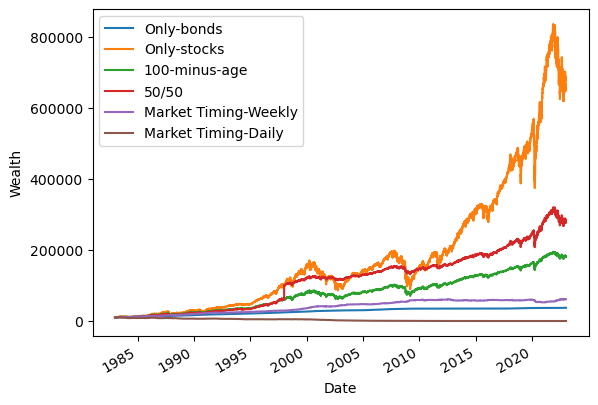

In [39]:
# Plot

df_plot = df1[['date', 'return']].copy()
df_plot.rename(columns={'return': 'Only-bonds'}, inplace=True)
df_plot['Only-bonds'] = df_plot['Only-bonds'] * 10000
df_plot['Only-stocks'] = df2['return'] * 10000
df_plot['100-minus-age'] = df3['return'] * 10000
df_plot['50/50'] = df4['return'] * 10000
df_plot['Market Timing-Weekly'] = df5['return'] * 10000
df_plot['Market Timing-Daily'] = df6['return'] * 10000

df_plot.head

plot = df_plot.plot(x = 'date', subplots=False)
plot.set_xlabel('Date')
plot.set_ylabel('Wealth')


In [40]:
# Question 3
from random import randrange
import statistics
# Стратегия 1 - Симуляция
returns = []
for i in range(1, 1100):
    year = randrange(1925, 2022)
    df_random_year = df[((df['date'] >= pd.to_datetime(str(year) + '-01-01')) & (df['date'] <= pd.to_datetime(str(year + 1) + '-12-31')))]
    dfi = calculate1(df_random_year)
    returns.append(dfi["return"].iloc[-1].astype(float))

returns = [i - 1 for i in returns]
mean = statistics.mean(returns)
std = statistics.stdev(returns)
sharp = mean / std
print(mean, std, sharp)


0.06323843269705105 0.061645945992062655 1.0258327888291867


In [41]:
# Стратегия 2 - Симуляция
returns = []
for i in range(1, 1100):
    year = randrange(1925, 2022)
    df_random_year = df[((df['date'] >= pd.to_datetime(str(year) + '-01-01')) & (df['date'] <= pd.to_datetime(str(year + 1) + '-12-31')))]
    dfi = calculate2(df_random_year)
    returns.append(dfi["return"].iloc[-1].astype(float))

returns = [i - 1 for i in returns]
mean = statistics.mean(returns)
std = statistics.stdev(returns)
sharp = mean / std
print(mean, std, sharp)

0.2688823481271343 0.3051416718208038 0.881172166760091


In [42]:
# Стратегия 3 - Симуляция
returns = []
for i in range(1, 1100):
    try:
        year = randrange(1925, 2022)
        df_random_year = df[((df['date'] >= pd.to_datetime(str(year) + '-01-01')) & (df['date'] <= pd.to_datetime(str(year + 1) + '-12-31')))]
        dfi = calculate3(df_random_year)
        returns.append(dfi["return"].iloc[-2].astype(float))
    except:
        pass

returns = [i - 1 for i in returns]
mean = statistics.mean(returns)
std = statistics.stdev(returns)
sharp = mean / std
print(mean, std, sharp)

C:\Users\Антон\AppData\Local\Temp\ipykernel_21580\281373433.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.loc[1:, 'age'] = 25
C:\Users\Антон\AppData\Local\Temp\ipykernel_21580\281373433.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.loc[1:, 'age'] = 25
C:\Users\Антон\AppData\Local\Temp\ipykernel_21580\281373433.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = 

0.18732734568139717 0.21175057468095723 0.8846603885899326


C:\Users\Антон\AppData\Local\Temp\ipykernel_21580\281373433.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.loc[1:, 'age'] = 25


In [61]:
# Стратегия 4 - Симуляция
returns = []
for i in range(1, 1100):
    try:
        year = randrange(1925, 2022)
        df_random_year = df[((df['date'] >= pd.to_datetime(str(year) + '-01-01')) & (df['date'] <= pd.to_datetime(str(year + 1) + '-12-31')))]
        dfi = calculate4(df_random_year)
        returns.append(dfi["return"].iloc[-1].astype(float))
    except:
        pass

returns = [i - 1 for i in returns]
mean = statistics.mean(returns)
std = statistics.stdev(returns)
sharp = mean / std
print(mean, std, sharp)

0.15838176478175262 0.12291540817010806 1.288542804678817


In [62]:
# Стратегия 5 - Симуляция
returns = []
for i in range(1, 1100):
    try:
        year = randrange(1925, 2022)
        df_random_year = df[((df['date'] >= pd.to_datetime(str(year) + '-01-01')) & (df['date'] <= pd.to_datetime(str(year + 1) + '-12-31')))]
        dfi = calculate5(df_random_year)
        returns.append(dfi["return"].iloc[-1].astype(float))
    except:
        pass

returns = [i - 1 for i in returns]
returns = [x for x in returns if str(x) != 'nan']
mean = statistics.mean(returns)
std = statistics.stdev(returns)
sharp = mean / std
print(mean, std, sharp)

0.0948614948159431 0.09158911824167773 1.035728879555653


In [65]:
# Стратегия 6 - Симуляция
returns = []
for i in range(1, 1100):
    try:
        year = randrange(1925, 2022)
        df_random_year = df[((df['date'] >= pd.to_datetime(str(year) + '-01-01')) & (df['date'] <= pd.to_datetime(str(year + 1) + '-12-31')))]
        dfi = calculate6(df_random_year)
        returns.append(dfi["return"].iloc[-1].astype(float))
    except:
        pass

returns = [i - 1 for i in returns]
returns = [x for x in returns if str(x) != 'nan']
mean = statistics.mean(returns)
std = statistics.stdev(returns)
sharp = mean / std
print(mean, std, sharp)

-0.2594080754199731 0.2164667682661117 -1.19837366953745
